 # Develop a project on the following methods using same data, and
## compare model performance based on statistical measures using your
## choice of programming language (e.g., python, R).
## simple linear regression
## multiple linear regression
## stepwise regression
## logistic regression
## polynomial regression
## nonlinear regression
## Explanation of data you are using
## Statement of the problem you attempt to solve by prediction
## Correlation matrix
## VIF
## Regression plot
## Model equation
## Conclusion


# Explanation of Dataset Being Used - Heart (Logistic Regression)

## This dataset contains measurements and data pretaing to heart disease and its causes.

### target - 0=no disease 1=disease
### age
### sex
### chest pain type (4 values)
### resting blood pressure
### serum cholestoral in mg/dl
### fasting blood sugar > 120 mg/dl
### resting electrocardiographic results (values 0,1,2)
### maximum heart rate achieved
### exercise induced angina
### oldpeak - ST depression induced by exercise relative to rest
### the slope of the peak exercise ST segment
### number of major vessels (0-3) colored by flourosopy
### thal - 0 = normal; 1 = fixed defect; 2 = reversable defect


# Question - What combination of variables give us the best logistic regression model based on the LLR P- value & Puesdo R^2

# Model Equation = log * (p(y=1)/(1- p(y=1))) = B0 + B1(age) + B2(fbs) +....+

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.ticker as ticker
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols
mpl.rcParams['axes.linewidth'] = 3.1
plt.rcParams['font.family'] = "Times New Roman"
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['xtick.bottom'] = True
mpl.rcParams['ytick.left'] = True

In [3]:
heart = pd.read_csv('heart (1).csv')
print(heart.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [4]:
model = smf.logit('target ~ fbs + age + sex + cp + trestbps + chol + restecg + thalach + exang + oldpeak + slope + ca + thal ', data=heart).fit()

Optimization terminated successfully.
         Current function value: 0.350681
         Iterations 7


In [5]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                 1025
Model:                          Logit   Df Residuals:                     1011
Method:                           MLE   Df Model:                           13
Date:                Wed, 15 Mar 2023   Pseudo R-squ.:                  0.4938
Time:                        15:43:06   Log-Likelihood:                -359.45
converged:                       True   LL-Null:                       -710.12
Covariance Type:            nonrobust   LLR p-value:                1.777e-141
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.6902      1.401      2.633      0.008       0.944       6.437
fbs           -0.1012      0.285     -0.355      0.723      -0.659       0.457
age           -0.0082      0.013     -0.650      0.5

#### Based on the model, the logistic regression model that includes all the independent variables is our best model, by giving ups a pusedo R^2 close to 1 and LLR p-value far below our signifigance level of.05

# Explanation of Dataset Being Used - Advertising (Linear/Multiple Regression)
## This dataset analyzesthe relationship between all forms of avertising – ‘TV, radio, newspaper’, and ‘sales’

# Question- Which combination of variables yields us the best linear/multiple regression model?

# Model equation = Y = B0+B1(TV)+B2(radio)+....+

In [7]:
ads=pd.read_csv('Advertising.csv')
print(ads.head())

      TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9


In [21]:
allcols=['TV','radio','newspaper']
X = ads[allcols]
y = pd.DataFrame(ads.iloc[:,-1])
X = sm.add_constant(X)

In [22]:
model = sm.OLS(y, X).fit()

In [23]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           1.58e-96
Time:                        19:25:33   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

#### The p value of newspaper is high above out signifigance level. The next step should to remove it and see if possibly yields us a better model

In [24]:
X = ads[['TV','radio']]

In [25]:
y = pd.DataFrame(ads.iloc[:,-1])
X = sm.add_constant(X)

In [26]:
model = sm.OLS(y, X).fit()

In [27]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           4.83e-98
Time:                        19:31:51   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.0

#### While the R values did not change from removing the newspaper variable, we did however get a lower better AIC which makes this our best  regression model. 

# VIF

In [29]:
vif = pd.DataFrame()
vif['variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

  variable       VIF
0    const  6.135476
1       TV  1.003013
2    radio  1.003013


# Correlation Matrix

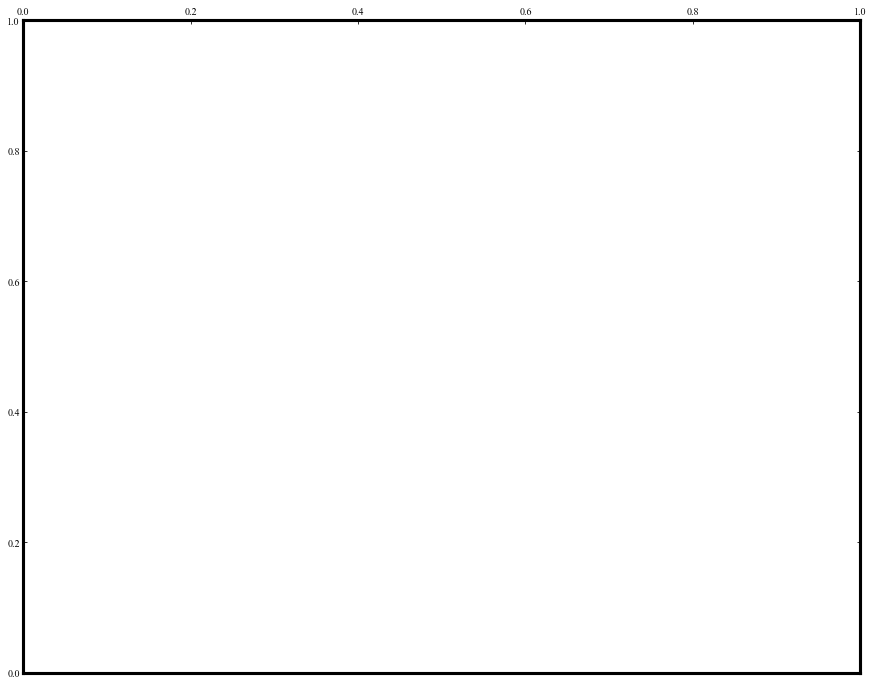

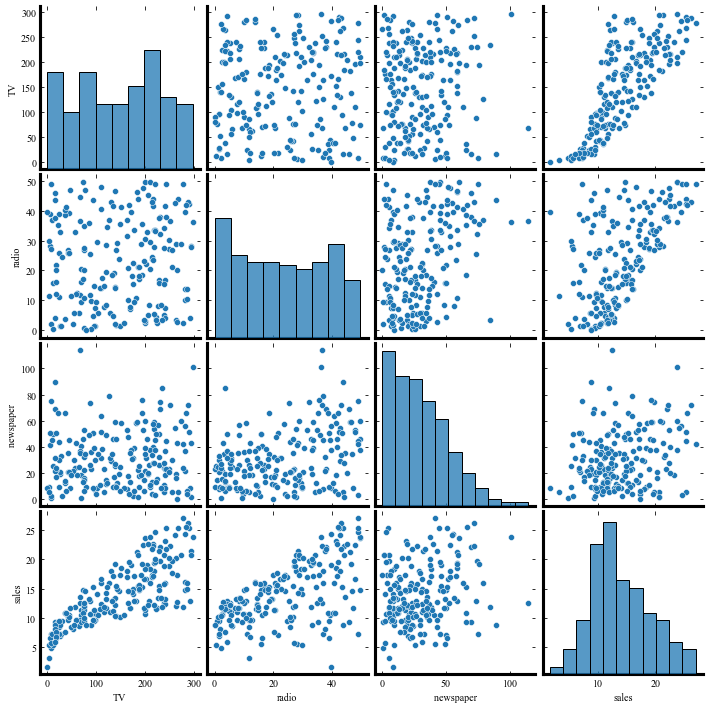

__________________________________________________


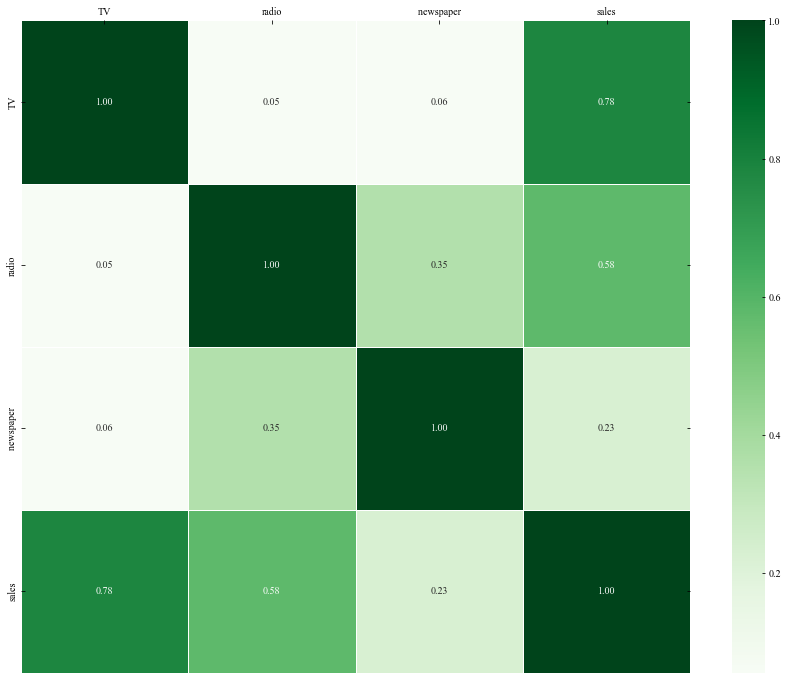

In [30]:
df= ads.iloc[: , :].copy()
corr = df.corr()
fig=plt.figure(figsize=(15,12))
ax = fig.add_subplot(111)
sns.pairplot(df)
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
plt.savefig("correlation_plot.pdf", bbox_inches='tight')
plt.show()
print('__________________________________________________')

df= ads.iloc[: , :].copy()
corr = df.corr()
fig=plt.figure(figsize=(15,12))
ax = fig.add_subplot(111)
sns.heatmap(corr,  cmap="Greens",annot=True , fmt=".2f", linewidth=.5)
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
plt.savefig("correlationmatrix_plot.pdf", bbox_inches='tight')
plt.show()

# Explanation of Dataset Being Used - Student Math Score (Polynomial/Stepwise/Quadratic/Cubic Regression)

## This dataset contains the number of hours students at a school studied and their math test scores

## HoursStudied - Num of hours student studied
## Mathscore - Score recieved on math test

# Question - What combination provides the best model?
# Model equation = Y= B0 + B1(HoursStudied) + B2(HoursStudied)^2 + B3(HoursStudied)^3 +....

In [31]:
test=pd.read_csv('StudentMathScore_TimeStudied.csv')
print(test.head())

   HoursStudied  MathScore
0          7.65      64.30
1          8.72      70.65
2         10.72      73.66
3         14.08      83.00
4          7.01      59.81


In [38]:
model_p1 = ols('MathScore ~ HoursStudied', data=test).fit()
print(model_p1.summary())

                            OLS Regression Results                            
Dep. Variable:              MathScore   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     192.7
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           2.44e-14
Time:                        20:58:45   Log-Likelihood:                -89.952
No. Observations:                  31   AIC:                             183.9
Df Residuals:                      29   BIC:                             186.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       40.6647      2.408     16.887   

In [40]:
model_p2 = ols('MathScore ~ np.power(HoursStudied, 2)+ HoursStudied', data=test).fit()
print(model_p2.summary())

                            OLS Regression Results                            
Dep. Variable:              MathScore   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     256.4
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           9.95e-19
Time:                        21:00:30   Log-Likelihood:                -75.585
No. Observations:                  31   AIC:                             157.2
Df Residuals:                      28   BIC:                             161.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [41]:
model_p3 = ols('MathScore ~ np.power(HoursStudied, 3)+np.power(HoursStudied, 2)+ HoursStudied', data=test).fit()
print(model_p3.summary())

                            OLS Regression Results                            
Dep. Variable:              MathScore   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     179.5
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           6.08e-18
Time:                        21:04:17   Log-Likelihood:                -74.326
No. Observations:                  31   AIC:                             156.7
Df Residuals:                      27   BIC:                             162.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

#### Based on the model, this quadratic + cubic model is the best one due to having the highest Adj R value and the lowest AIC.

## Regression Plot

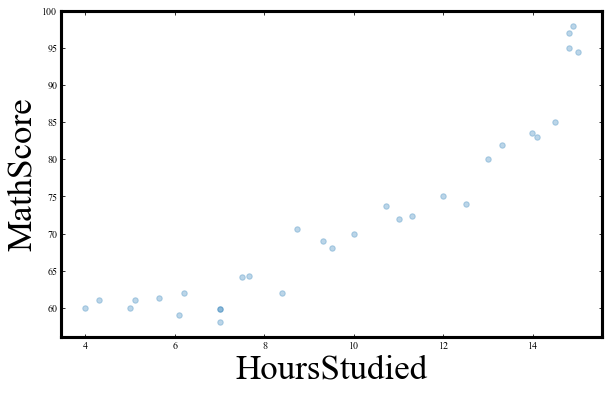

In [45]:
plt.figure(figsize=(6 * 1.618, 6))
plt.scatter(test.HoursStudied, test.MathScore, s=30, alpha=0.3)
plt.xlabel('HoursStudied', fontsize=35)
plt.ylabel('MathScore', fontsize=35)
x = pd.DataFrame({'HoursStudied': np.linspace(test.HoursStudied.min(), test.HoursStudied.max(), 100)})

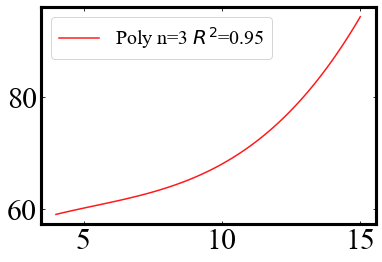

In [47]:
poly_3 = smf.ols(formula='MathScore ~ 1 + HoursStudied + I(HoursStudied ** 2.0) + I(HoursStudied ** 3.0)', data=test).fit()
plt.plot(x.HoursStudied, poly_3.predict(x), 'r-', alpha=0.9,
         label='Poly n=3 $R^2$=%.2f' % poly_3.rsquared, )
plt.tick_params(axis='both', which='major', labelsize=30)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.legend(fontsize=20)
plt.savefig("Mathscore.pdf", bbox_inches='tight')